In [2]:
# training linear classifier using gradient descent
# Bernard Merialdo - June 2024

import sys
import numpy as np
import matplotlib.pyplot as plt

# Visualizing SVM
def visualize_svm(x,y,w,b,errors):

    def get_hyperplane_value(x, w, b, offset):
        if w[1] == 0: return 0
        return -(w[0] * x + b + offset) / w[1]

    # show points
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1,2,1)
    plt.scatter(x[:,0],x[:,1],marker="o", c=['b' if y[i]>0 else 'r' for i in range(len(y))])

    # show boundaries
    x0_1 = 0
    x0_2 = 20

    for delta in [-1,1,0]:
        x1_1 = get_hyperplane_value(x0_1, w, b, delta)
        x1_2 = get_hyperplane_value(x0_2, w, b, delta)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], ["k","y--","k"][delta+1])

    ax.set_xlim([0,20])
    ax.set_ylim([0,20])
    plt.xlabel('x1')
    plt.ylabel('x2')

    # show error
    ax = fig.add_subplot(1,2,2)
    x = [int(i*len(errors)/100) for i in range(100)]
    plt.plot(x,[errors[i] for i in x])
    plt.xlabel('epochs')
    plt.title('Error - learning_rate='+str(learning_rate))
    ax.set_ylim(ymin=0)

    if 'figure_out' in globals():
        plt.savefig(figure_out)
    plt.show()

def SVM(X, y, learning_rate=0.001, C=1, n_epochs=10):
    n_samples, n_features = X.shape

    w = np.zeros(n_features)
    b = 0

    errors = []
    for epoch in range(n_epochs):
        error = 0.5 * np.dot(w,w)
        for i, x_i in enumerate(X):
            ti = y[i] * (np.dot(w,x_i) + b)
            if ti <= 1:
                error += C * (1 - ti)
        errors.append(error)

        gradw = np.zeros(n_features)
        gradb = 0
        for i, x_i in enumerate(X):
            ti = y[i] * (np.dot(w,x_i) + b)
            if ti <= 1:
                gradw += y[i] * x_i
                gradb += y[i]

        w = w - learning_rate * ( w - C * gradw)
        b = b - learning_rate * (- C * gradb)

        if epoch % 1000 == 0: print('epoch=',epoch,'error=',error)

    print('w,b=',w,b)

    return w,b,errors

# read data
def read_data(file_path):
    x = []
    y = []
    with open(file_path,'r') as ifile:
        for line in ifile:
            a = line.split()
            x.append([float(a[0]),float(a[1])])
            y.append(float(a[2]))
    X = np.array(x)
    Y = np.array(y)
    print('X=',X)
    print('Y=',Y)
    return X,Y

In [3]:
# Specify the file path
file_path = 'practice2.data1.txt'
#file_path = 'practice2.data2.txt'
# file_path = 'practice2.data3.txt'

X,Y = read_data(file_path)

X= [[17. 14.]
 [12.  7.]
 [ 5. 13.]]
Y= [ 1. -1. -1.]


epoch= 0 error= 3.0
epoch= 1000 error= 2.1435173702880346
epoch= 2000 error= 2.100005913575314
epoch= 3000 error= 2.0634496269701676
epoch= 4000 error= 2.04026586846863
epoch= 5000 error= 2.0118883889183996
epoch= 6000 error= 1.9928198712748544
epoch= 7000 error= 1.9507974202223333
epoch= 8000 error= 1.9220000029123805
epoch= 9000 error= 1.8934352374546302
w,b= [ 0.17277057 -0.10346939] -0.5430999999999683


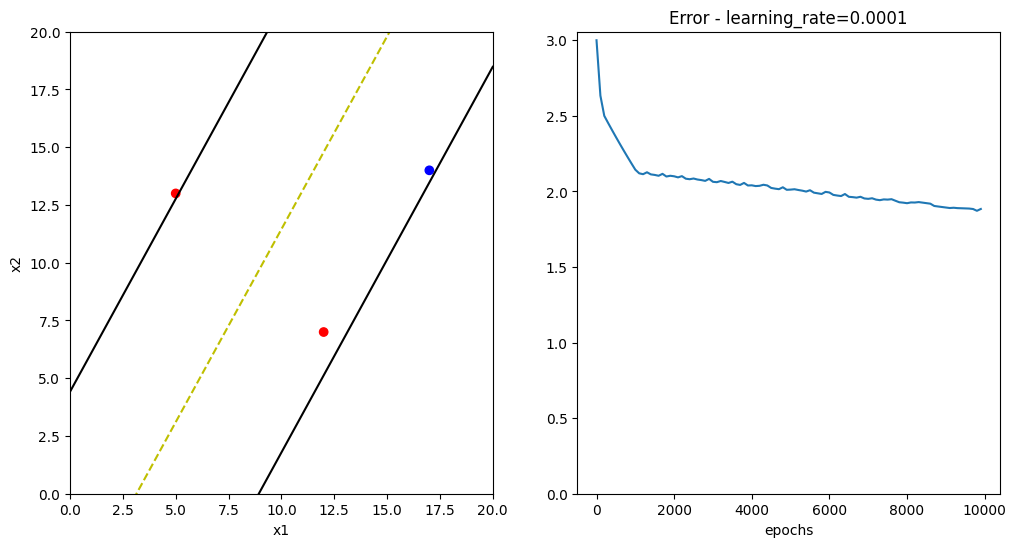

In [4]:
# default values of the learning parameters
learning_rate = 0.0001
C = 1
n_epochs = 10000

# Train SVM
weights,b,errors = SVM(X,Y,learning_rate=learning_rate, C=C, n_epochs=n_epochs)

visualize_svm(X,Y,weights,b,errors)